### Assignment: Car Image Classification

#### Objective:

This assignment aims to help You build an image classification model for car images using a deep learning framework like TensorFlow/Keras. You will preprocess images, train a model, and evaluate its performance.

#### Tasks:

1. **Dataset Setup:**

   * Download the "Car Image Dataset" from https://www.kaggle.com/datasets/kshitij192/cars-image-dataset/data.
   * Unzip the dataset and upload the training and test datasets to your Google Drive (or local machine if not using Colab).

2. **Environment Setup:**

   * Import necessary libraries, including `numpy`, `pandas`, and `tensorflow`.
   * Mount Google Drive if using Google Colab to access the dataset.

3. **Data Preprocessing:**

   * Load the images from the train and test directories.
   * Resize images to a standard size (e.g., 128x128 or 224x224).
   * Normalize pixel values by scaling the images to a range of 0 to 1.
   * Perform data augmentation (e.g., flipping, rotation) to increase model robustness.

4. **Model Construction:**

   * Build a CNN model using Keras.

     * Add convolutional layers, followed by pooling layers, and flatten the output.
     * Add one or more fully connected layers.
     * Include a softmax output layer for multi-class classification.
   * Compile the model with an appropriate optimizer, loss function, and evaluation metric.

5. **Model Training:**

   * Train the model using the training set and evaluate it on the test set.
   * Record performance metrics such as accuracy, loss, and time taken to train.

6. **Evaluate the Model:**

   * Evaluate the model’s performance on the test data.
   * Plot the training and validation loss/accuracy curves.
   * Discuss the results and explain any overfitting or underfitting observed.
.

#### Submission:

* Submit the Jupyter notebook with all code.
---


In [2]:
train_dir = r"C:\Users\Ebad\Desktop\data sci\Cars Dataset\train"
test_dir =  r"C:\Users\Ebad\Desktop\data sci\Cars Dataset\test"

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = 128

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = True
)

training_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (image_size,image_size),
    class_mode = 'sparse'
)

for image_batch, image_label in training_generator:
    print("Image Shape:", image_batch[0].shape)
    print("Pixel Range(Min - Max):", image_batch[0].min(), image_batch[0].max())
    print("Label: ", image_label[0])
    break 

Found 3352 images belonging to 7 classes.
Image Shape: (128, 128, 3)
Pixel Range(Min - Max): 0.0015030918 1.0
Label:  4.0


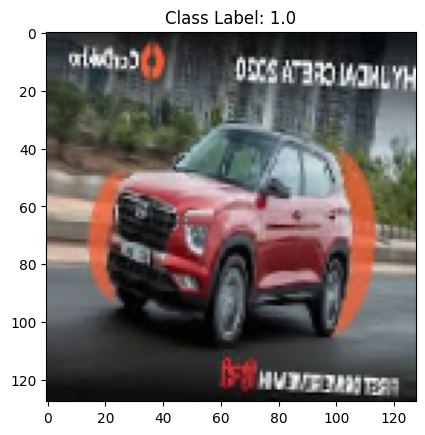

In [5]:
plt.imshow(image_batch[18])
plt.title(f"Class Label: {image_label[18]}")
plt.show()

In [6]:
class_names = list(training_generator.class_indices.keys())
print(class_names)

['Audi', 'Hyundai Creta', 'Mahindra Scorpio', 'Rolls Royce', 'Swift', 'Tata Safari', 'Toyota Innova']


In [7]:
test_datagen = ImageDataGenerator(
    rescale = 1./255
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (image_size,image_size),
    class_mode = 'sparse',
    shuffle = False
)

Found 813 images belonging to 7 classes.


In [8]:
for image_batch, image_label in test_generator:
    print("Image Shape:", image_batch[0].shape)
    print("Pixel Range(Min - Max):", image_batch[0].min(), image_batch[0].max())
    print("Label: ", image_label[0])
    break 

Image Shape: (128, 128, 3)
Pixel Range(Min - Max): 0.0 1.0
Label:  0.0


In [9]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape = (image_size,image_size,3), activation = 'relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), padding='same' , activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))

model.add(Dense(7, activation='softmax'))

C:\Users\Ebad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

history = model.fit(
    training_generator,
    epochs = 100,
    validation_data = test_generator
)


C:\Users\Ebad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 39s 337ms/step - accuracy: 0.2303 - loss: 1.9308 - val_accuracy: 0.2878 - val_loss: 1.8443
Epoch 2/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 34s 319ms/step - accuracy: 0.3031 - loss: 1.8079 - val_accuracy: 0.3383 - val_loss: 1.7555
Epoch 3/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 34s 321ms/step - accuracy: 0.3308 - loss: 1.7496 - val_accuracy: 0.4010 - val_loss: 1.6842
Epoch 4/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 35s 330ms/step - accuracy: 0.3526 - loss: 1.7012 - val_accuracy: 0.3973 - val_loss: 1.6102
Epoch 5/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 35s 336ms/step - accuracy: 0.4001 - loss: 1.6101 - val_accuracy: 0.4403 - val_loss: 1.5140
Epoch 6/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 35s 331ms/step - accuracy: 0.4227 - loss: 1.5542 - val_accuracy: 0.4871 - val_loss: 1.4197
Epoch 7/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 35s 334ms/step - accuracy: 0.4550 - loss: 1.4903 - val_accuracy: 0.5191 - val_loss: 1.3688
Epoch 8/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 42s 339ms/step - accuracy: 0.4818 -

In [11]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(test_loss)
print(test_accuracy)

26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.7060 - loss: 1.3987
1.3987427949905396
0.7060270309448242


In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

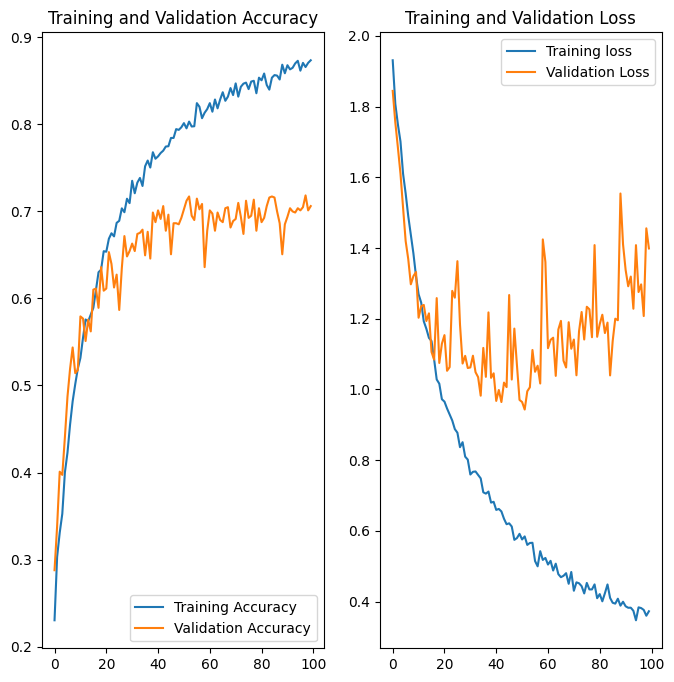

In [13]:
EPOCHS = 100

plt.figure(figsize = (8,8))

plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label ='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label = 'Training loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title("Training and Validation Loss")

plt.show()

In [14]:
print(f"The Training accuracy increased very well and training loss reduced very well and due to this the validation dataset which is basically the testing dataset is having a good accuracy near 0.7 which is decent and a test loss of 1.3 which is also less.")

The Training accuracy increased very well and training loss reduced very well and due to this the validation dataset which is basically the testing dataset is having a good accuracy near 0.7 which is decent and a test loss of 1.3 which is also less.


In [16]:
model.save(r"C:\Users\Ebad\Desktop\data sci\Assignment_20_328943(CNN_&_Data_Augmentation).h5")
print("Model saved Successfully.")

Model saved Successfully.
